# Day_008

### 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline # 內嵌繪圖，並且可以省略掉 plt.show()

In [2]:
# 設定 data_path
dir_data = 'D:/Coding Project/GitHub/ML100-Days/data/Topic_1/'
f_app = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app)
print('Path of read in data: %s' % (f_app))

Path of read in data: D:/Coding Project/GitHub/ML100-Days/data/application_train.csv


In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 練習時間
### HW
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
app_train.groupby(['CNT_CHILDREN']).size()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
dtype: int64

In [5]:
# 1 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
cut_rule = [-np.Inf, 0, 2, 5, np.Inf]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, labels = ["0_childs", "1-2_childs", "3-5_childs", "> 5_childs"], include_lowest = True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0_childs      215371
1-2_childs     87868
3-5_childs      4230
> 5_childs        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [6]:
# 2-1 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL
grp = ['TARGET','CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']  # groupby(['欄位'])['要運算的欄位']
grp_mean = grouped_df.mean()
grp_mean

TARGET  CNT_CHILDREN_GROUP
0       0_childs              166747.010980
        1-2_childs            174590.584401
        3-5_childs            175053.742913
        > 5_childs            139159.090909
1       0_childs              160804.210548
        1-2_childs            176115.362720
        3-5_childs            160677.385714
        > 5_childs            180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [7]:
grouped_df.describe()

count           mean           std      min  \
TARGET CNT_CHILDREN_GROUP                                                   
0      0_childs            198762.0  166747.010980  1.061799e+05  25650.0   
       1-2_childs           80081.0  174590.584401  1.201981e+05  26550.0   
       3-5_childs            3810.0  175053.742913  1.128427e+05  29250.0   
       > 5_childs              33.0  139159.090909  7.112483e+04  45000.0   
1      0_childs             16609.0  160804.210548  8.483011e+04  25650.0   
       1-2_childs            7787.0  176115.362720  1.327159e+06  27900.0   
       3-5_childs             420.0  160677.385714  1.130315e+05  36000.0   
       > 5_childs               9.0  180000.000000  7.377118e+04  90000.0   

                                25%       50%       75%          max  
TARGET CNT_CHILDREN_GROUP                                             
0      0_childs            112500.0  144000.0  202500.0   13500000.0  
       1-2_childs          112500.0  157500.0  211500.0   18000090.0  
       3-5_childs          112500.0  157500.0  202500.0    2250000.0  
       > 5_childs           90000.0  112500.0  180000.0     337500.0  
1      0_childs            112500.0  135000.0  202500.0    1890000.0  
       1-2_childs          112500.0  135000.0  202500.0  117000000.0  
       3-5_childs           96750.0  135000.0  185625.0    1350000.0  
       > 5_childs          135000.0  180000.0  202500.0     315000.0

In [8]:
# 2-2 繪製 baxplot
Target_0 = app_train[app_train['TARGET'] == 0].groupby(['CNT_CHILDREN_GROUP'])['AMT_INCOME_TOTAL']
Target_0 = pd.DataFrame(dict(list(Target_0)))

Target_1 = app_train[app_train['TARGET'] == 1].groupby(['CNT_CHILDREN_GROUP'])['AMT_INCOME_TOTAL']
Target_1 = pd.DataFrame(dict(list(Target_1)))

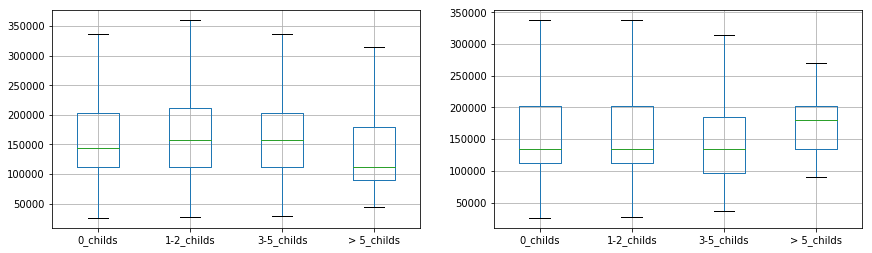

In [9]:
plt.subplots_adjust(right = 2)  # 調整子圖之間的間距
plt.subplot(1,2,1)
Target_0.boxplot(showfliers = False)

plt.subplot(1,2,2)
Target_1.boxplot(showfliers = False)
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


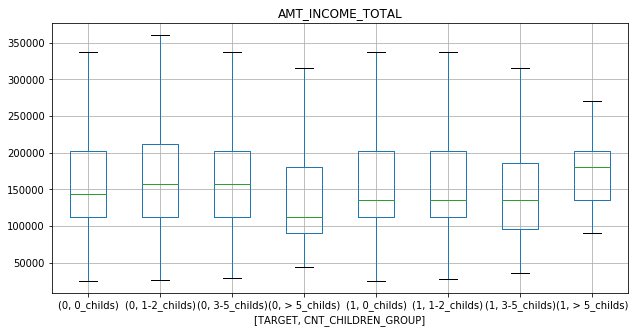

In [10]:
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['TARGET', 'CNT_CHILDREN_GROUP']

app_train.boxplot(column = plt_column, by = plt_by, showfliers = False, figsize=(10,5))
plt.suptitle('')

plt.show()

In [11]:
# 3 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: x-np.mean(x)/np.std(x))
app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,202498.104340
1,270000.0,269998.429576
2,67500.0,67498.429576
3,135000.0,134998.429576
4,121500.0,121498.429576
